### ESMA 3016
### Edgar Acuna
### Lab15: Distribucion Normal o Gaussiana

In [22]:
from scipy.stats  import norm,probplot
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,factorial,pi
%matplotlib inline

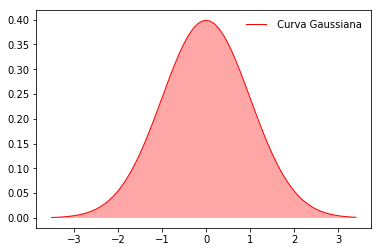

In [48]:
x=np.arange(-3.5,3.5,.1)
plt.plot(x, norm.pdf(x), 'k-', lw=1, label=' Curva Gaussiana',color='r')
plt.fill_between(x, y1= norm.pdf(x),facecolor='red',alpha=0.35)
plt.legend(loc='best', frameon=False)

### Area debajo de la normal estandar a la izquierda de x=1.5

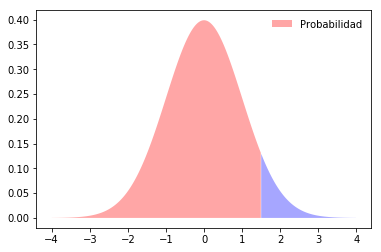

In [30]:
plt.fill_between(x=np.arange(-4,1.5,0.01), y1= norm.pdf(np.arange(-4,1.5,0.01)),facecolor='red',alpha=0.35,label='Probabilidad')
plt.fill_between(x=np.arange(1.5,4,0.01), y1= norm.pdf(np.arange(1.5,4,0.01)),facecolor='blue',alpha=0.35)
plt.legend(loc='best', frameon=False)

In [31]:
norm.cdf(1.5,0,1)

0.93319279873114191

### Area entre x=-2.25 y x=2.07

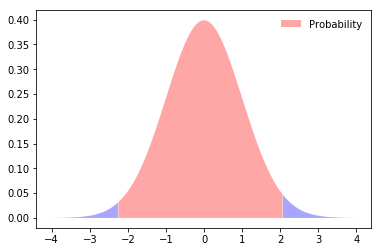

In [37]:
plt.fill_between(x=np.arange(-4,-2.25,0.01), y1= norm.pdf(np.arange(-4,-2.25,0.01)),facecolor='blue',alpha=0.35)
plt.fill_between(x=np.arange(-2.25,2.07,0.01), y1= norm.pdf(np.arange(-2.25,2.07,0.01)),facecolor='red',alpha=0.35,
                label='Probability')
plt.fill_between(x=np.arange(2.07,4,0.01), y1= norm.pdf(np.arange(2.07,4,0.01)),facecolor='blue',alpha=0.35)
plt.legend(loc='best', frameon=False)

In [38]:
norm.cdf(2.07)-norm.cdf(-2.25)

0.968549355117438

In [6]:
#Area mas alla de x=.55
1-norm.cdf(.55)

0.29115968678834636

In [7]:
#Calculo de cuantiles(percentiles) para la normal estandar
#el 20% inferior
norm.ppf(.2)

-0.84162123357291418

In [8]:
#el 10% superior
norm.ppf(.9)

1.2815515655446004

In [39]:
#Verificando que el area de la mitad de la curva normal es .5
def halfnormal(x,k):
     #x es el punto hasta donde se calcula el area desde el centro,x>0
     #k+1 es el numero de terminos que se usan de la serie de potencias para aproximar el area 
     normal_5=0
     for i in range(k):
         normal_5+=((-1)**i)*(x)**(2*i+1)/((2**i)*(2*i+1)*factorial(i))
     return(normal_5/sqrt(2*pi))

In [40]:
halfnormal(3.3,15)

0.5022055318949152

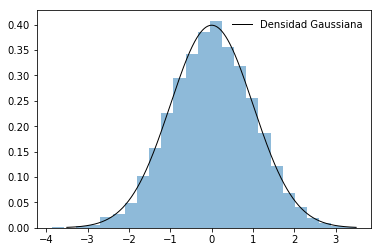

In [11]:
#***************************************************************************
#simulando una muestra de 10000 valores de una normal estandar
a=norm.rvs(size=10000)
#Haciendo un histograma de los datos pero de tal manera que el area total sea 1
#Comparando graficamente el histograma con la curva normal
x=np.arange(-3.5,3.5,.01)
fig, ax = plt.subplots(1, 1)
ax.hist(a, bins=25,normed = True,alpha=.5)
ax.plot(x, norm.pdf(x), 'k-', lw=1, label='Densidad Gaussiana')
ax.legend(loc='best', frameon=False)

In [12]:
#Estimando la media y varianza de una normal
np.mean(a)

0.014777980484908724

In [13]:
np.var(a)

0.98726976780136133

### Ejemplo de aplicacion

Los promedios academicos de los egresados de uan universidad se distribuyen normalmente con media 
$\mu=2.5$ y desviacion estandar $\sigma=.5$

a) cual es la probabilidad de que un egresado se haya graduado con un un gpa menor que 3.0

In [41]:
norm.cdf(3.0,2.5,.5)

0.84134474606854293

b) cual es la probabildiad de que un egresado se haya graduado con un gpa de mas de 3.?

In [42]:
1-norm.cdf(3.5,2.5,.5)

0.022750131948179209

c) cual es la probabilidad de que un egresado se haya graduado con un gpa mayor de 2.0 pero menor de 3.3

In [16]:
norm.cdf(3.3,2.5,.5)-norm.cdf(2.0,2.5,.5)

0.78654545436898493

d) A los egresados que tengan un GPA que caen el el 1% superior se le dara un premio cual es el gpa minimo
para obtener un premio?

In [43]:
norm.ppf(.99,2.5,.5) 

3.6631739370204204

### Ejemplo 2.  
El tiempo que le toma a los estudiantes en ir de su casa a la Universidad se distribuye normalmente con media 20 minutos y desviación estándar 5. 

a)	¿Cuál es la probabilidad de que a un estudiante le tome más de 18 minutos en llegar a la universidad?

In [49]:
1-norm.cdf(18,20,5)

0.65542174161032418

b) ¿Cuál es la probabilidad de que un estudiante llegue a la universidad en menos de 30 minutos?  

In [51]:
norm.cdf(30,20,5)

0.97724986805182079

c)	¿A qué hora debe salir el estudiante de su casa si se desea que llegue tarde a su clase de la 8:00 a.m. solamente un 5 por ciento de las veces?


In [53]:
#Hallando el precentile del 95%
norm.ppf(.95,20,5)

28.224268134757359

Luego, le restamos esos minutos a las 8am y esa seria la hora de salida 8.00 - .28=7.32am 

### Cotejando normalidad de una muestra usando un plot de normalidad

In [46]:
#Generando al azar la muestra
muestra=norm.rvs(size=200)

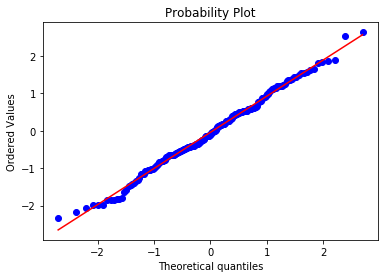

In [47]:
res=probplot(muestra,plot=plt)
plt.show()

### En los extremos de la distribucion los puntos tienden a alejarse de la diagonal, lo cual es una indicacion
### de que no hay normalidad